<a href="https://colab.research.google.com/github/IshanBadiyani/ISOM_835_Term-Project_Ishan-Badiyani/blob/main/Telco_Churn_Notebook_(Ishan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TELCO Churn Dataset**

**Project Objective**

This project focuses on predicting customer churn for a telecom company using real-world data. By applying machine learning models, the goal is to identify patterns that indicate whether a customer is likely to leave, enabling proactive retention strategies.

**Dataset Description**

The dataset, sourced from Kaggle’s Telco Customer Churn data, contains information about 7,000+ customers including their demographics, service details, billing behavior, and churn status. The target variable is Churn, indicating whether the customer left the company. The dataset includes both categorical and numerical features, making it ideal for building classification models like Logistic Regression, Random Forest, and XGBoost.

#**Step 1: Load and Explore the Dataset**

In this step, I load the Telco Customer Churn dataset using Pandas and perform a quick initial inspection. This includes checking the number of rows and columns, understanding the data types, and reviewing summary statistics to get a basic sense of the dataset’s structure and contents.

In [2]:
import pandas as pd

#Loading the file using Pandas
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

#Initial Data Summary
print(df.shape)
print(df.info())
df.describe()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **STEP 2: VISUALIZATION OF KEY FEATURE**

Before applying predictive models, it’s essential to explore the relationships between key features and the target variable (Churn). In this section, I use visualizations to analyze how numerical variables like MonthlyCharges and tenure vary across churned and retained customers, and how categorical features like Contract influence churn behavior.

These insights help validate business assumptions, detect potential data imbalances, and guide preprocessing decisions such as encoding and scaling. Additionally, a correlation heatmap of numerical features supports early-stage feature selection and ensures better model performance downstream.


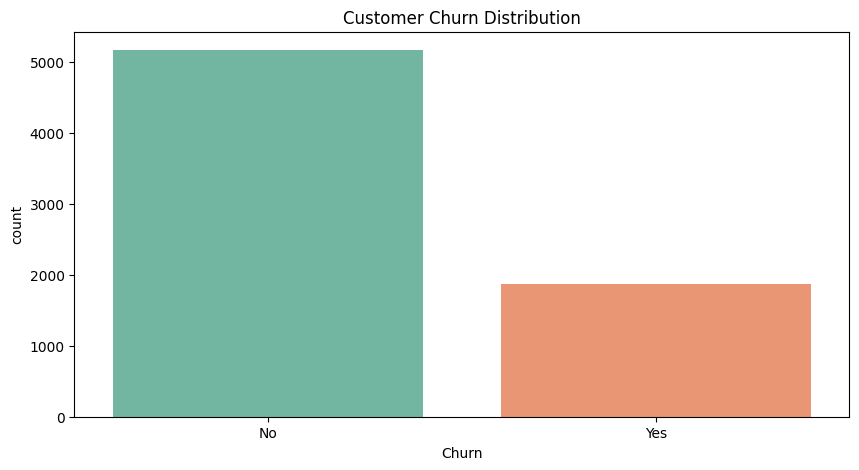

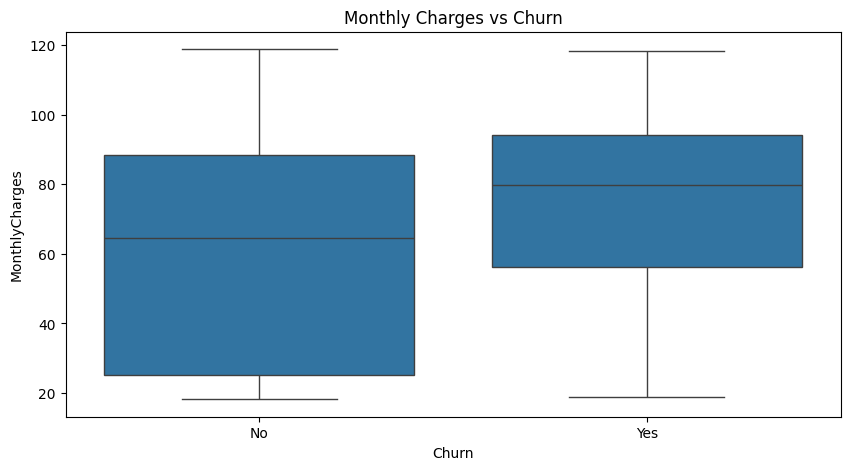

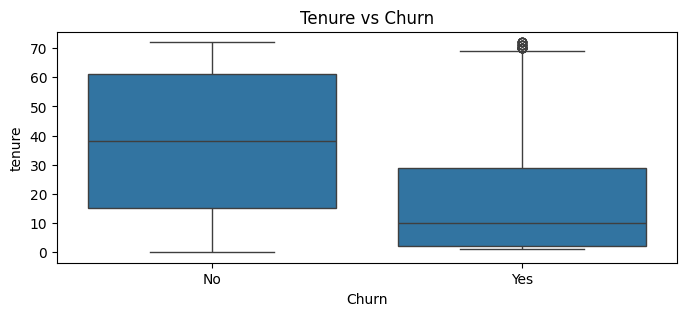

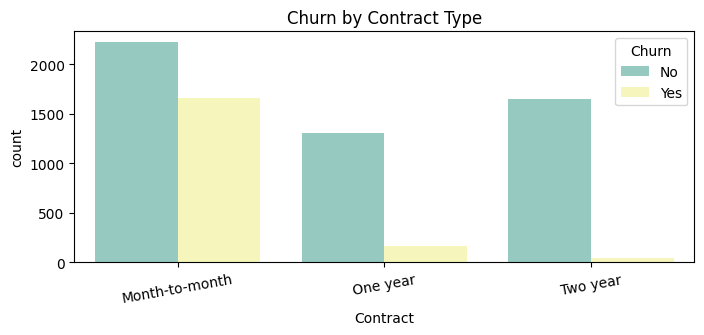

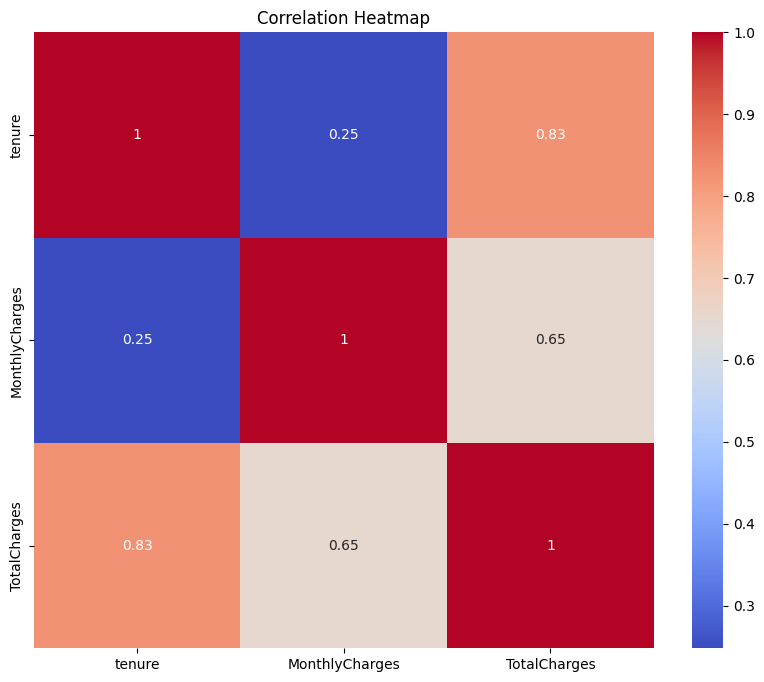

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Churn Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Customer Churn Distribution')
plt.show()

# 2. Monthly Charges vs Churn
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

# 3. Tenure vs Churn
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()

# 4. Contract Type vs Churn
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set3')
plt.title('Churn by Contract Type')
plt.xticks(rotation=10)
plt.show()

# 5. Heatmap of Correlation (Numerical)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




# **STEP 3: Data Cleaning Tasks**

**Preprocessing**

Before training any models, it's important to prepare the dataset by handling data type issues, encoding categorical features, and scaling numeric variables. In this step, I convert TotalCharges to numeric and fill missing values, standardize binary fields like SeniorCitizen, apply one-hot encoding to categorical variables, and scale key numeric columns using StandardScaler to ensure consistent feature magnitudes for model training.


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# STEP 1: Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaNs with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


# STEP 2: Convert 'SeniorCitizen' from 0/1 to 'Yes'/'No'
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})


# STEP 3: Confirm there are no missing values
df.isnull().sum().sum() == 0, df.isnull().sum()

# STEP 4: One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# STEP 5: Scale numeric columns
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Final check
df_encoded.head()


,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-1.277445,-1.160323,-0.994242,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0.066327,-0.259629,-0.173244,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,-1.236724,-0.362660,-0.959674,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0.514251,-0.746535,-0.194766,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,-1.236724,0.197365,-0.940470,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


## **STEP 4: Predictive Modelling and Evaluation**

I tested three models to predict churn: Logistic Regression (simple and interpretable), Random Forest (captures complex patterns and shows feature importance), and XGBoost (high-performance boosting model).

Each was trained on the processed data and evaluated using Accuracy, F1 Score, and ROC-AUC to measure both overall performance and how well they handle class imbalance.



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Suppress deprecation and future warnings globally
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


# Split dataset
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store results
results = {}

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, lr_preds),
    'F1 Score': f1_score(y_test, lr_preds),
    'ROC-AUC': roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
}

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_preds),
    'F1 Score': f1_score(y_test, rf_preds),
    'ROC-AUC': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
}

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, xgb_preds),
    'F1 Score': f1_score(y_test, xgb_preds),
    'ROC-AUC': roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
}

# Display results
for model, metrics in results.items():
    print(f"\n{model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Logistic Regression
Accuracy: 0.8034
F1 Score: 0.5991
ROC-AUC: 0.8419

Random Forest
Accuracy: 0.7991
F1 Score: 0.5571
ROC-AUC: 0.8297

XGBoost
Accuracy: 0.7821
F1 Score: 0.5621
ROC-AUC: 0.8166


#**STEP 5: Confusion Matrix & ROC Curve for All Models**

To evaluate how well each model distinguishes between churned and non-churned customers, I visualize the confusion matrix for Logistic Regression, Random Forest, and XGBoost. These matrices provide a breakdown of true positives, true negatives, false positives, and false negatives — offering insight into each model's classification performance beyond accuracy alone. This is especially useful in churn prediction, where class imbalance can skew traditional metrics.

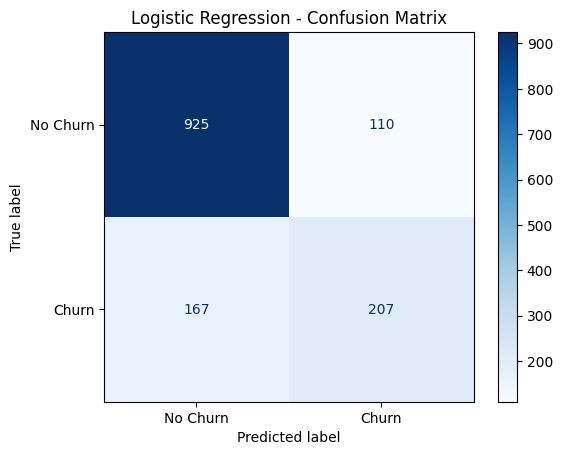

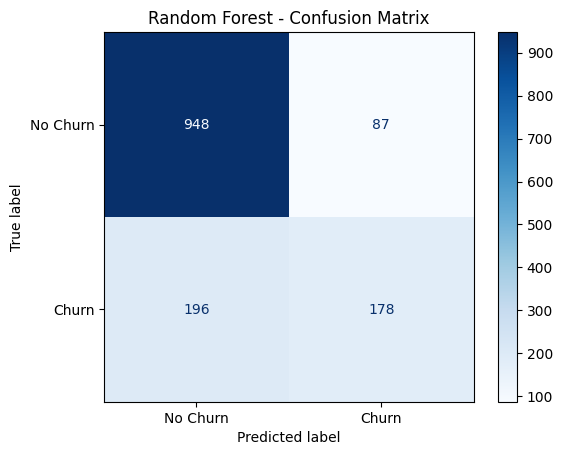

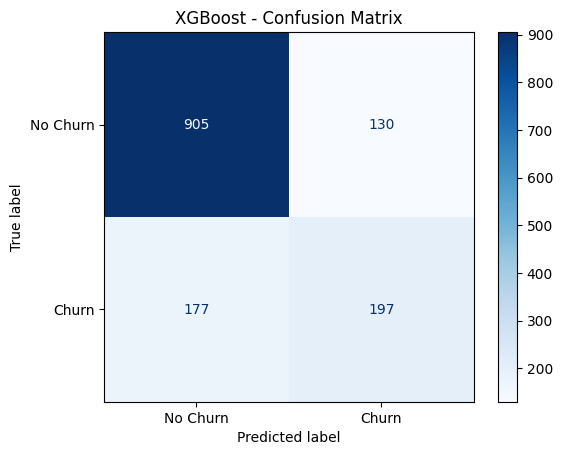

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrices
models = {
    'Logistic Regression': (lr, lr_preds),
    'Random Forest': (rf, rf_preds),
    'XGBoost': (xgb, xgb_preds)
}

for name, (model, preds) in models.items():
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()
